### Problem Statment
    Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")


### Bank client data:
      1 - age: (numeric)
      2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-     employed','services','student','technician','unemployed','unknown')
      3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
      4 - education: (categorical: primary, secondary, tertiary and unknown)
      5 - default: has credit in default? (categorical: 'no','yes','unknown')
      6 - housing: has housing loan? (categorical: 'no','yes','unknown')
      7 - loan: has personal loan? (categorical: 'no','yes','unknown')
      8 - balance: Balance of the individual.

### Related with the last contact of the current campaign:
     9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10 - day: last contact day of the month (numeric)
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12 - duration: last contact duration, in seconds (numeric)

### Other attributes:
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Approach
    We will start by analzing the dataset provided to get better understanding that we will be working with.
    
    Here we will start visulzing the find the missing values and dropping the unnecessary featues before feeding the data 
    into model

    After EDA we will develop a logistis regression model and acuuracy

### Importing the libraires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve

In [3]:
data=pd.read_csv("D:/ExcelR Data Science/Assignments/Logistic Regression/bank-full.csv",sep = ';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Reviewing the general Properties of dataset

In [4]:
data.shape

(45211, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.isnull().any().sum()


0

In [8]:
data.isna().any().sum()

0

In [9]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
print("Jobs:\n",data['job'].unique())
print("Marital:\n",data['marital'].unique())
print("Education:\n",data['education'].unique())
print("Default:\n",data['default'].unique())
print("Housing:\n",data['housing'].unique())
print("Loan:\n",data['loan'].unique())
print("Contact:\n",data['contact'].unique())
print("Month:\n",data['month'].unique())

print("Poutcme:\n",data['poutcome'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Poutcme:
 ['unknown' 'failure' 'other' 'success']


### Descriptive Stattistics

In [48]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.034527,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,2.580478,5.523014,2.571277,2.763841,40.197828,0.580323,2.559974,0.116985
std,0.739194,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,1.080153,3.006911,1.234459,3.098021,100.128746,2.303441,0.989059,0.321406
min,1.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,2.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,3.000000,6.000000,2.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,3.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,3.000000,8.000000,3.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,4.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,4.000000,11.000000,5.000000,63.000000,871.000000,275.000000,3.000000,1.000000


### Plotting Correlation

In [51]:
Corr_= data.corr()

<AxesSubplot:>

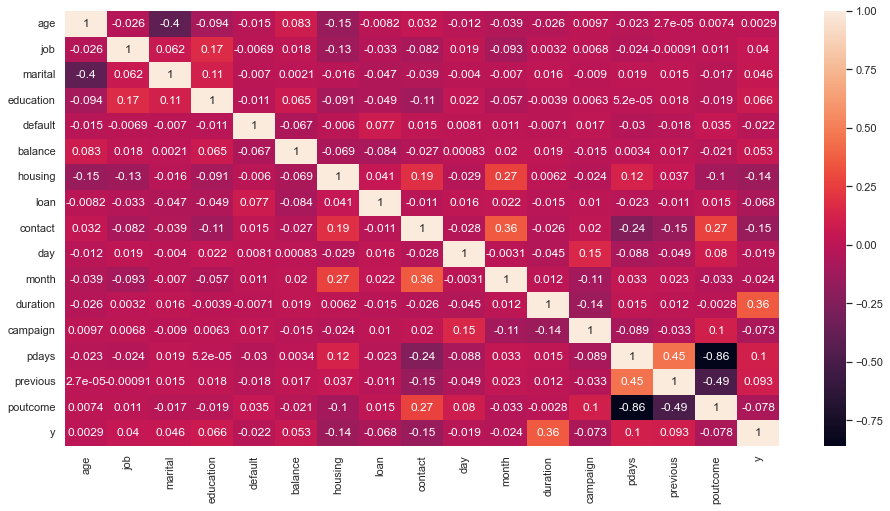

In [52]:
plt.figure(figsize= (16, 8))
sns.heatmap(data=Corr_,annot=True)

### Job Count Distribution

    what kind of job the bank clients have

Text(0.5, 1.0, 'Job Count Distribution')

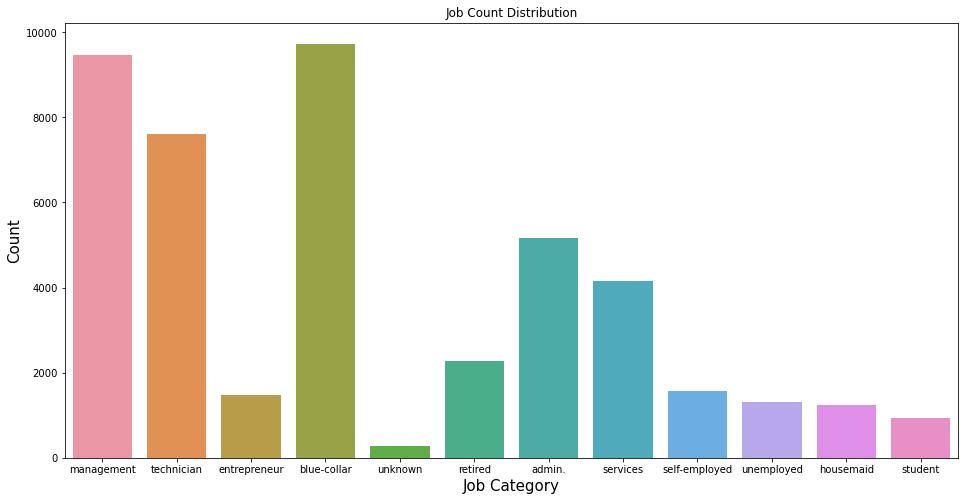

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(x=data['job'],data=data)
plt.xlabel('Job Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Job Count Distribution')



In [12]:
cat_columns=['job','marital','education','default','housing','loan','contact','month','poutcome']
title=['Job Count Distribution','Marital Count Distribution','Education Count Distribution','Default Count Distribution',
      'Housing Count Distribution','Loan Count Distribution','Contct Count Distribution','Month Count Distribution',
       'Poutcome Count Distribution']

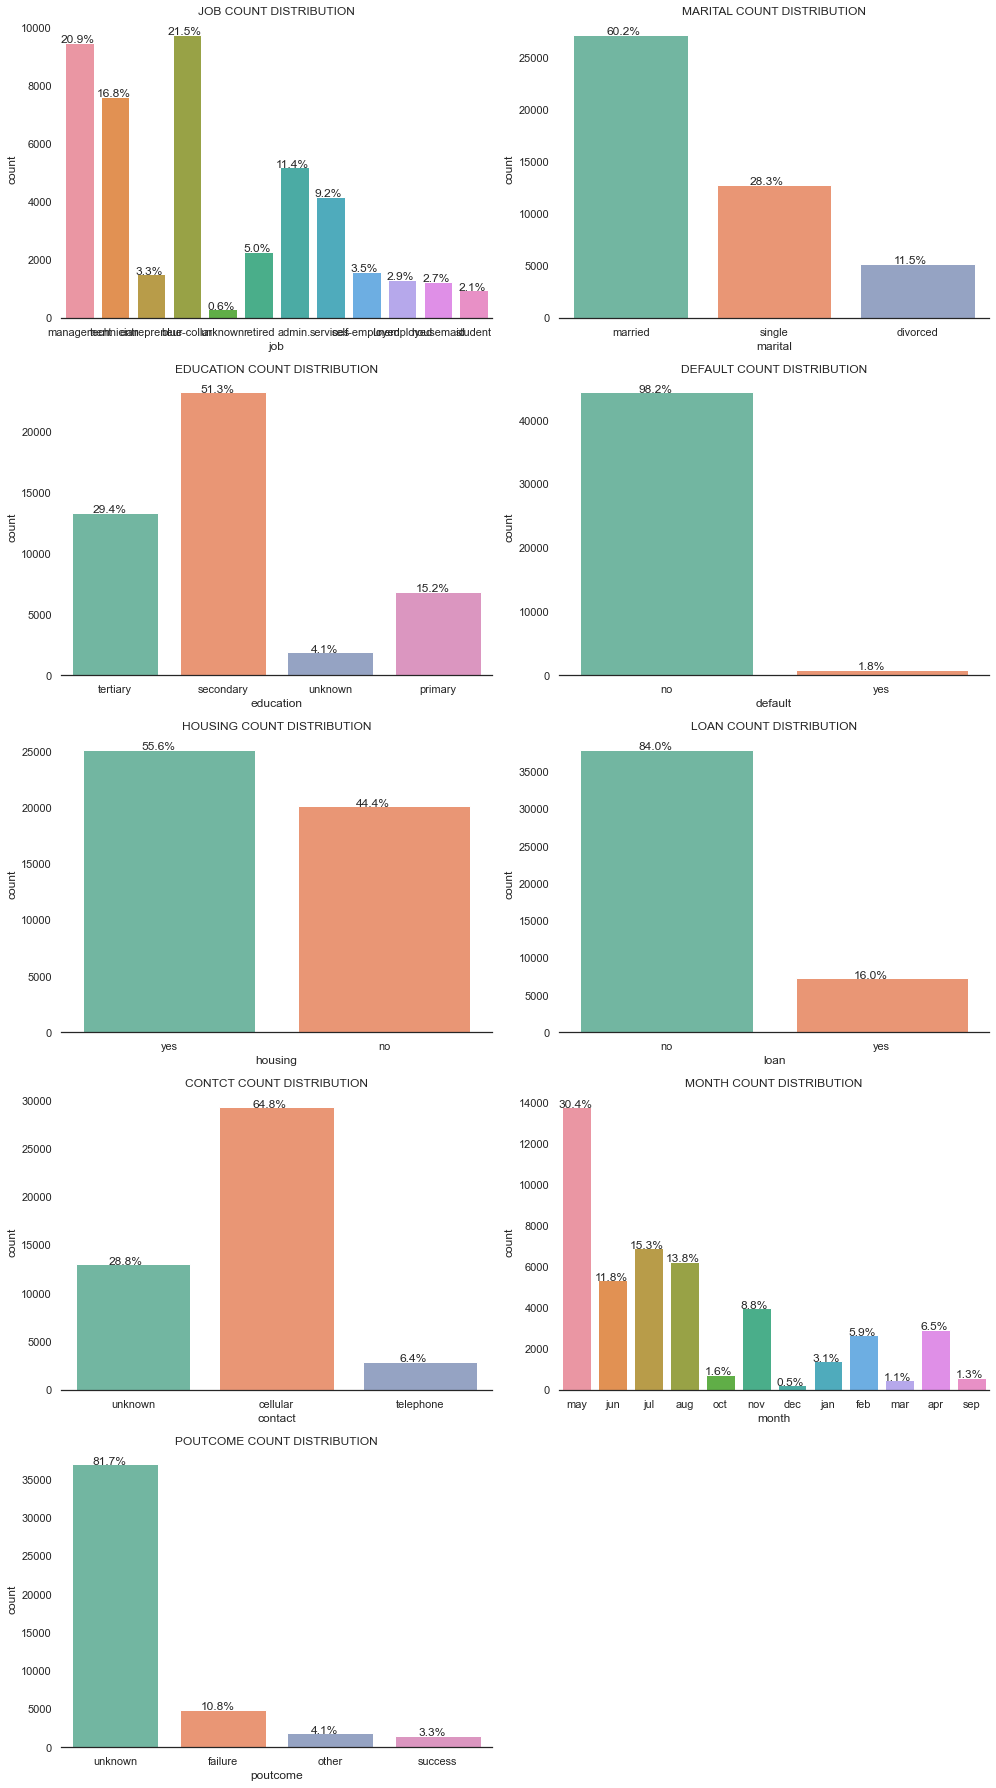

In [13]:
plt.figure(figsize=(14,25))

sns.set_theme(style="white") 
for i, variable in enumerate(cat_columns):
    plt.subplot(5,2,i+1)
    order = data[variable].value_counts(ascending=False).index 
    sns.set_palette('Set2')
    ax=sns.countplot(x=data[variable], data=data )
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
        plt.tight_layout()
        plt.title(title[i].upper())
                                     

### Observations
   1. around 28% of clients are singles
   2. 51.3% of clients are completed their secondary education
   3. 55.5% clinets have housing loan
   4. 64.8% clients are contacted throgh Cell
   5. Most Calls happended In the month of May
   6. Sucess rate of last campign oly 3.3%and most percentage is unknown
     

In [14]:
#Trying to find some strange values or null values
print('Min age: ', data['age'].max())
print('Max age: ', data['age'].min())
print('Null Values: ', data['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


C:\Users\anilr\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\anilr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


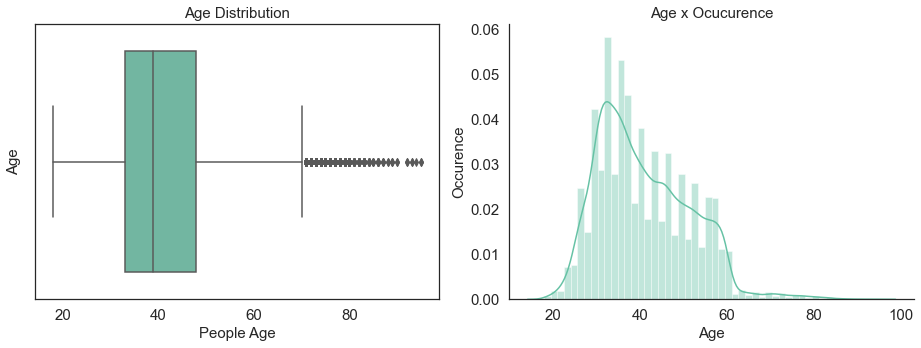

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [16]:
print('1º Quartile: ', data['age'].quantile(q = 0.25))
print('2º Quartile: ', data['age'].quantile(q = 0.50))
print('3º Quartile: ', data['age'].quantile(q = 0.75))
print('4º Quartile: ', data['age'].quantile(q =1.00))

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0


In [17]:
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  70.5 are outliers


In [18]:
print('Numerber of outliers: ', data[data['age'] > 70.5]['age'].count())
print('Number of clients: ', len(data))

Numerber of outliers:  487
Number of clients:  45211


In [19]:
#Outliers in %
print('Outliers are:', round(data[data['age'] > 69.6]['age'].count()*100/len(data),2), '%')

Outliers are: 1.23 %


data is dispersed highly in middle means all aged people can subscribe the term deposit,or not
The Outliers calculted , with or without we can fit into the model

In [20]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 
data['contact']     = labelencoder_X.fit_transform(data['contact']) 
data['month']       = labelencoder_X.fit_transform(data['month']) 
data['poutcome'] = labelencoder_X.fit_transform(data['poutcome']) 
data['y'] = labelencoder_X.fit_transform(data['y'])

### Creating group for days and performing Label Encoder
     -- 1-7 days will fall under 1st Week
     -- 8-14 days will fall under 2nd week
     -- 15-21 days will fall under 3rd week
     -- 22-31 days will fall under 4th week

In [21]:
def day(dataframe):
    dataframe.loc[dataframe['day'] <=7, 'day'] = 1
    dataframe.loc[(dataframe['day'] > 7) & (dataframe['day'] <= 14), 'day'] = 2
    dataframe.loc[(dataframe['day'] > 14) & (dataframe['day'] <= 21), 'day'] = 3
    dataframe.loc[(dataframe['day'] > 21) & (dataframe['day'] <= 31), 'day'] = 4
           
    return dataframe

day(data);

In [22]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data);

In [23]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,1,8,261,1,-1,0,3,0
1,2,9,2,1,0,29,1,0,2,1,8,151,1,-1,0,3,0
2,2,2,1,1,0,2,1,1,2,1,8,76,1,-1,0,3,0
3,2,1,1,3,0,1506,1,0,2,1,8,92,1,-1,0,3,0
4,2,11,2,3,0,1,0,0,2,1,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,3,9,977,3,-1,0,3,1
45207,4,5,0,0,0,1729,0,0,0,3,9,456,2,-1,0,3,1
45208,4,5,1,1,0,5715,0,0,0,3,9,1127,5,184,3,2,1
45209,3,1,1,1,0,668,0,0,1,3,9,508,4,-1,0,3,0


### Duration

C:\Users\anilr\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\anilr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


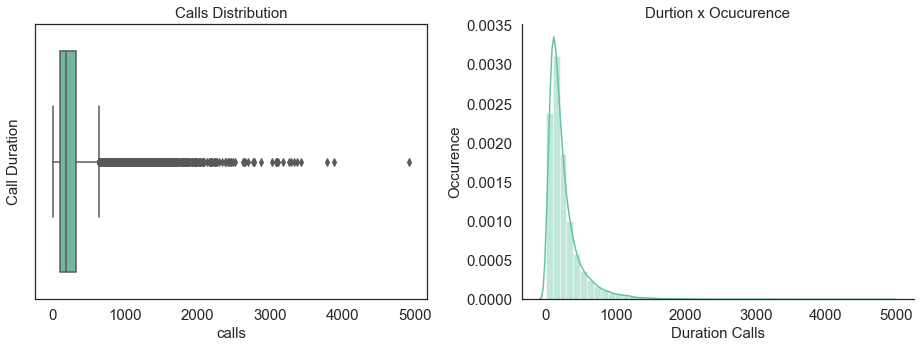

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('calls', fontsize=15)
ax1.set_ylabel('Call Duration', fontsize=15)
ax1.set_title('Calls Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Durtion x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [25]:
print('1º Quartile: ', data['duration'].quantile(q = 0.25))
print('2º Quartile: ', data['duration'].quantile(q = 0.50))
print('3º Quartile: ', data['duration'].quantile(q = 0.75))
print('4º Quartile: ', data['duration'].quantile(q =1.00))

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0


In [26]:
print('Duration calls above: ', data['duration'].quantile(q = 0.75) + 
                      1.5*(data['duration'].quantile(q = 0.75) - data['duration'].quantile(q = 0.25)), 'are outliers')

Duration calls above:  643.0 are outliers


In [27]:
print('Numerber of outliers: ', data[data['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(data))

print('Outliers are:', round(data[data['duration'] > 644.5]['duration'].count()*100/len(data),2), '%')

Numerber of outliers:  3222
Number of clients:  45211
Outliers are: 7.13 %


In [28]:
data[data['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,3,4,1,0,0,351,1,0,2,4,8,0,4,-1,0,3,0
22937,2,9,1,1,0,5535,0,0,0,4,1,0,15,-1,0,3,0
36425,1,2,1,1,0,162,1,1,0,2,8,0,2,-1,0,3,0


In [29]:
def duration(dataframe):

    dataframe.loc[dataframe['duration'] <= 102, 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > 102) & (dataframe['duration'] <= 180)  , 'duration']    = 2
    dataframe.loc[(dataframe['duration'] > 180) & (dataframe['duration'] <= 319)  , 'duration']   = 3
    dataframe.loc[(dataframe['duration'] > 319) & (dataframe['duration'] <= 644.5), 'duration'] = 4
    dataframe.loc[dataframe['duration']  > 644.5, 'duration'] = 5

    return dataframe
duration(data);

In [30]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,0,2143,1,0,2,1,8,3,1,-1,0,3,0
1,2,9,2,1,0,29,1,0,2,1,8,2,1,-1,0,3,0
2,2,2,1,1,0,2,1,1,2,1,8,1,1,-1,0,3,0
3,2,1,1,3,0,1506,1,0,2,1,8,1,1,-1,0,3,0
4,2,11,2,3,0,1,0,0,2,1,8,3,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,3,9,5,3,-1,0,3,1
45207,4,5,0,0,0,1729,0,0,0,3,9,4,2,-1,0,3,1
45208,4,5,1,1,0,5715,0,0,0,3,9,5,5,184,3,2,1
45209,3,1,1,1,0,668,0,0,1,3,9,4,4,-1,0,3,0


In [31]:
X=data.drop(['y'],axis=1)
Y=data['y']
print("Train Data:\n",X.shape)
print("Test data:\n",Y.shape)

Train Data:
 (45211, 16)
Test data:
 (45211,)


In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)


In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [36]:
y_pred=lr.predict(X_test)
print("Cofusion Matrix:\n",confusion_matrix(y_pred,Y_test))
print("Accuracy:\n",round(accuracy_score(y_pred, Y_test),2)*100)

Cofusion Matrix:
 [[9749 1082]
 [ 201  271]]
Accuracy:
 89.0


In [37]:
from sklearn import metrics

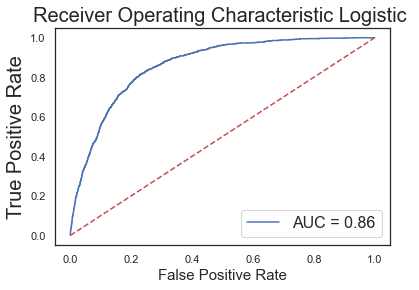

In [38]:


probs = lr.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog =metrics.roc_curve(Y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

plt.plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Logistic ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.

False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.


In [39]:
print('Classification\n',classification_report(Y_test, y_pred))

Classification
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.57      0.20      0.30      1353

    accuracy                           0.89     11303
   macro avg       0.74      0.59      0.62     11303
weighted avg       0.86      0.89      0.86     11303

